# Lineages of Planaria: wildtype samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_version_and_date()
sc.logging.print_versions_dependencies_numerics()

Running Scanpy 0.4.2.post2 on 2018-02-06 15:40.
Dependencies: numpy==1.13.3 scipy==1.0.0 pandas==0.21.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


Some plotting parameters.

In [2]:
aga_plot_params = dict(
    legend_fontsize=5,
    root='neoblast 1',
    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    max_edge_width=0.7,
    fontsize=3.5)

Get the data.

In [3]:
adata = sc.read('./write/planaria_171202_R.h5ad')

In [4]:
adata_full = sc.read('./data/171202/reg.dge.txt', cache=True).transpose()

... reading from cache file ./write/data/171202/reg.dge.h5


Reduce to the 7377 wildtype cells.

In [5]:
adata = adata[adata_full.obs_names.str.startswith(('plan1', 'plan2', 'dmso', 'life'))]
adata.n_obs

7377

Compute the tSNE coordinates.

In [6]:
sc.tl.tsne(adata)

computing tSNE
    using data matrix X directly (no PCA)
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:01:10.967)


Run AGA.

running Approximate Graph Abstraction (AGA)
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9899162054  0.9891273975  0.9882879853  0.9877929688
      0.9868714213  0.9857141376  0.9792798162  0.9785678983  0.9744473696
      0.9634378552  0.9574761987  0.9475815296  0.9403741956  0.9260969162]
    abstracted graph will have 51 nodes
    finished (0:00:22.503)


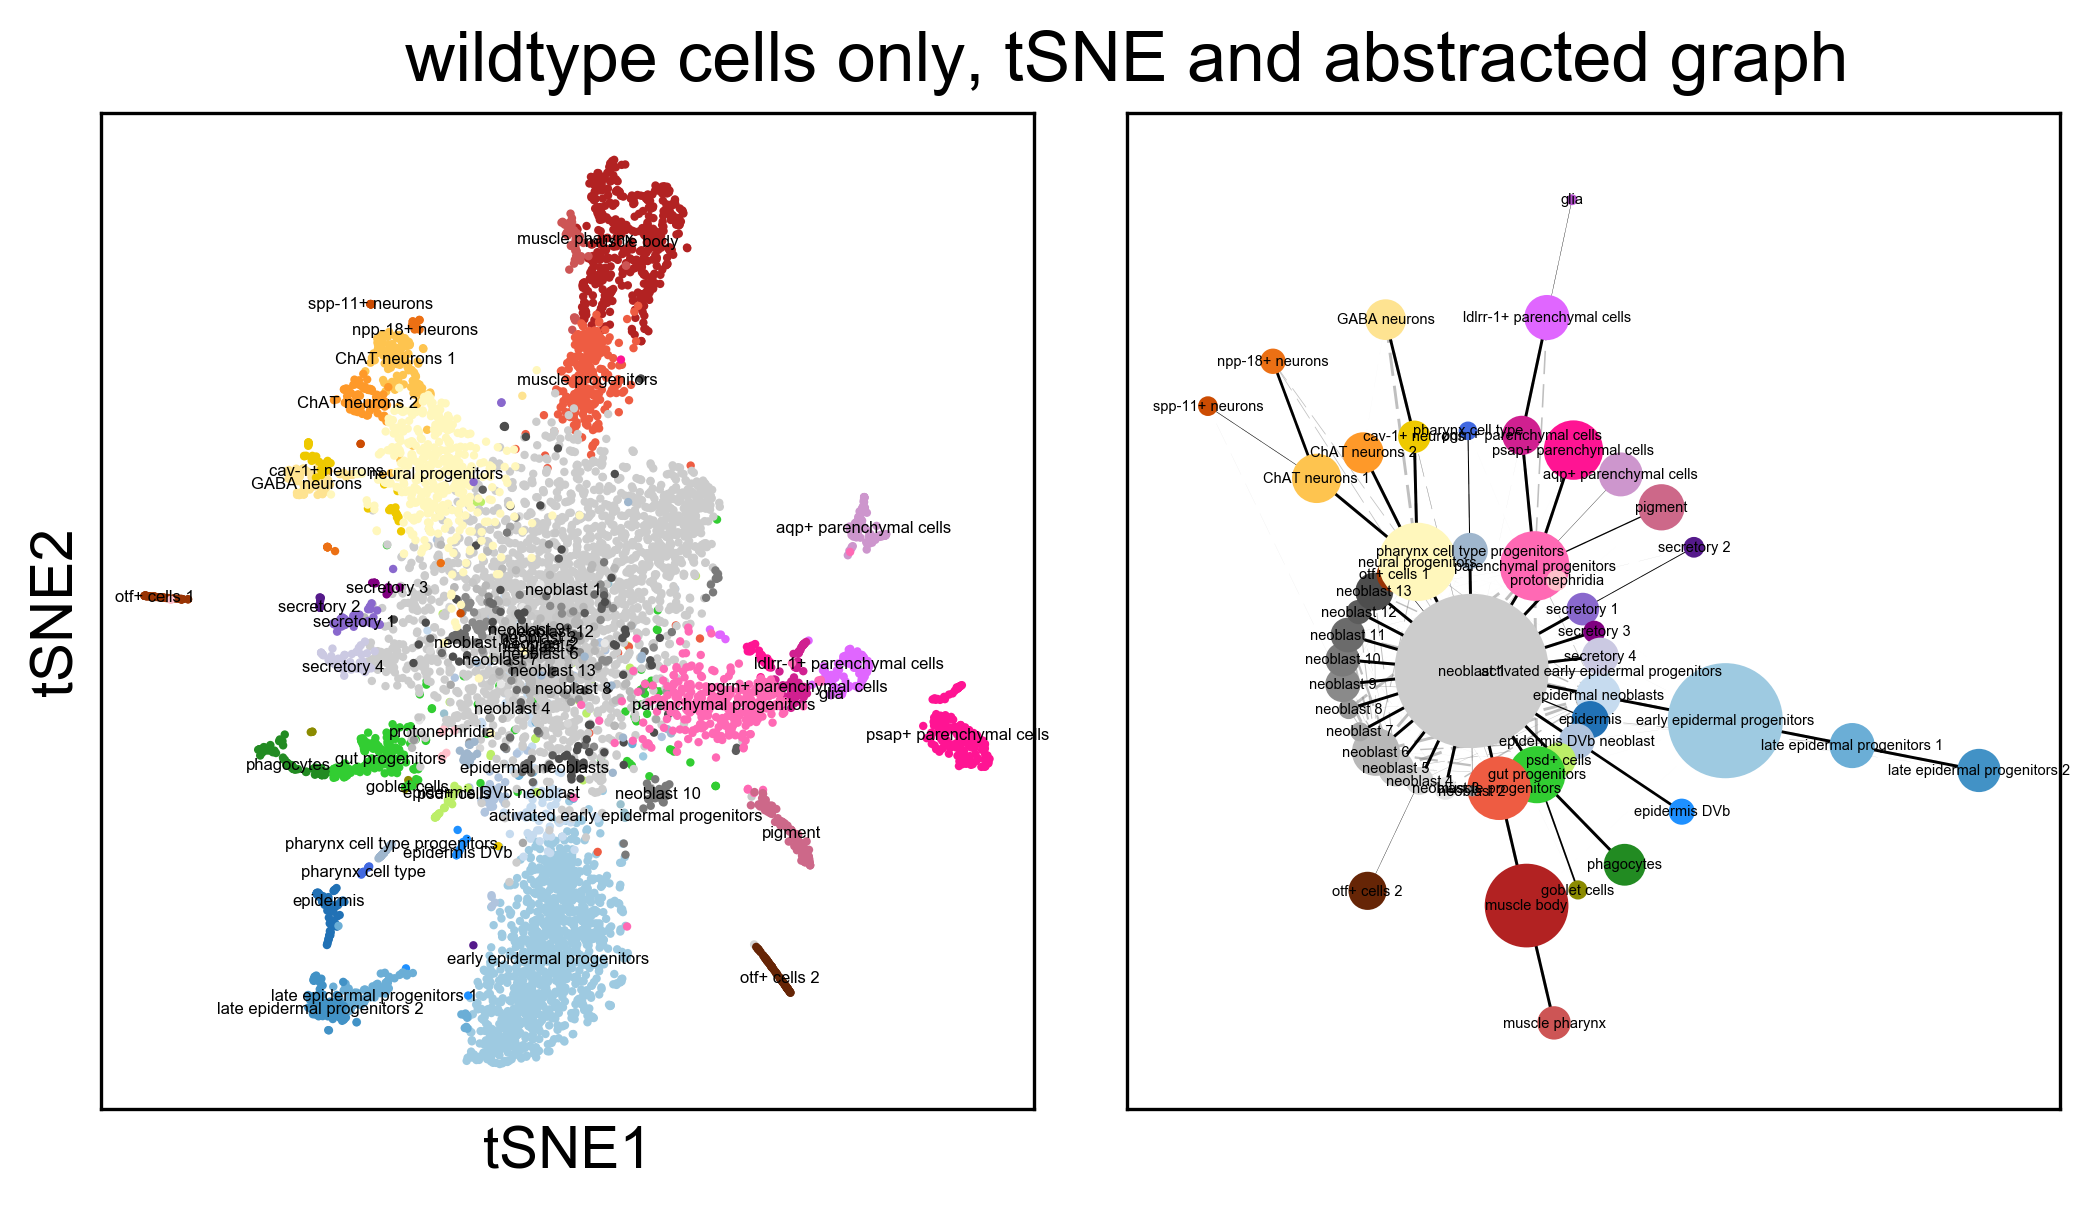

In [7]:
sc.tl.aga(adata, groups='clusters', n_neighbors=30, recompute_graph=True)
sc.pl.aga(adata, title='wildtype cells only, tSNE and abstracted graph', **aga_plot_params, save='_wildtype')

Export the results.

In [8]:
adata.obs[['clusters', 'aga_pseudotime']].to_csv('./export_R_dataset_wildtype/R_aga_groups_pseudotime.csv')
np.savetxt('./export_R_dataset_wildtype/R_aga_groups_ordered_names.csv',
           adata.obs['clusters'].cat.categories, fmt='%s')
np.savetxt('./export_R_dataset_wildtype/R_aga_adjacency_full.txt', adata.uns['aga_adjacency_full_confidence'])
from scipy.io import mmwrite
mmwrite('./export_R_dataset_wildtype/R_aga_adjacency_tree.mtx', adata.uns['aga_adjacency_tree_confidence'])
entropies = sc.tl.aga_expression_entropies(adata)
np.savetxt('./export_R_dataset_wildtype/R_aga_expression_entropies.txt', entropies)
degrees = sc.tl.aga_degrees(adata)
degrees = (degrees - np.min(degrees)) / (np.max(degrees) - np.min(degrees)) 
np.savetxt('./export_R_dataset_wildtype/R_aga_expression_degrees.txt', degrees)